In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import umap
import glob

In [2]:
path = r'D:\Data\merged_data' # use your path
all_files = glob.glob(path + "/*.csv")
print(all_files)
file_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    file_list.append(df)

total_data_df = pd.concat(file_list, axis=0, ignore_index=True)

['D:\\Data\\merged_data\\dataset0_smoothed.csv', 'D:\\Data\\merged_data\\dataset2_smoothed.csv']


In [3]:
print(total_data_df.shape)
total_data_df.head()

(58638, 287)


,File_No,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,...,Part,Die,Cast_date,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed
0,B1012-278-1AF10005,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,...,B1012-278-1,1,2018-01-15,1,5,0,0,0,0,0.0
1,B1012-278-1AF10006,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,...,B1012-278-1,1,2018-01-15,1,6,0,0,0,0,0.0
2,B1012-278-1AF10007,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,...,B1012-278-1,1,2018-01-15,1,7,0,0,0,0,0.0
3,B1012-278-1AF10008,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,...,B1012-278-1,1,2018-01-15,1,8,0,0,0,0,0.0
4,B1012-278-1AF10009,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,...,B1012-278-1,1,2018-01-15,1,9,0,0,0,0,0.0


In [4]:
total_features_df = total_data_df.drop(['File_No', 'Die', 'Cast_date','cav1_defect','cav2_defect','defect_smoothed'], axis=1)
total_features_df.head()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_en13,tiebar_en14,tiebar_en15,tiebar_mse,tiebar_mae,Part,Shift,Shot_no,dayOfWeek,defect
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,-0.483169,-0.611454,-0.387602,0.002732,0.035002,B1012-278-1,1,5,0,0
1,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,-0.477430,-0.606745,-0.379443,0.002792,0.035812,B1012-278-1,1,6,0,0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,-0.474928,-0.604088,-0.373460,0.002860,0.037235,B1012-278-1,1,7,0,0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,-0.462039,-0.586925,-0.352818,0.002696,0.037237,B1012-278-1,1,8,0,0
4,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,-0.443705,-0.595761,-0.323802,0.002910,0.039074,B1012-278-1,1,9,0,0


In [5]:
features_df = total_features_df.drop(['defect'], axis=1)
features_df = pd.get_dummies(features_df)
labels_df = total_features_df.loc[:, ['defect']]
features_df.head()


,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_mse,tiebar_mae,Shift,Shot_no,dayOfWeek,Part_B1012-278-1,Part_B1012-278-2,Part_B1012-278-3,Part_B1012-278-4,Part_B1022-278-1
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,0.002732,0.035002,1,5,0,1,0,0,0,0
1,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,0.002792,0.035812,1,6,0,1,0,0,0,0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,0.002860,0.037235,1,7,0,1,0,0,0,0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,0.002696,0.037237,1,8,0,1,0,0,0,0
4,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,0.002910,0.039074,1,9,0,1,0,0,0,0


In [6]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)



(58638, 284)


Total variance explained: 0.8638626306237415


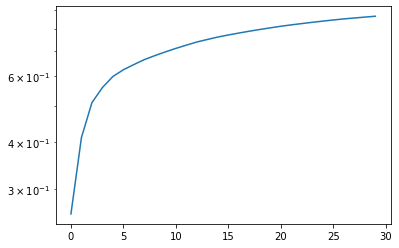

In [7]:
pca = PCA(n_components=30)
trans_features = pca.fit_transform(scaled_features)

print('Total variance explained:', pca.explained_variance_ratio_.sum())
plt.semilogy(pca.explained_variance_ratio_.cumsum())

In [8]:
target = labels_df.defect.values
print(target.shape)
print(trans_features.shape)
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#    trans_features, target, test_size=0.4, random_state=42)
 
#linear_regression(X_train,y_train)

(58638,)
(58638, 30)


(58638, 30)

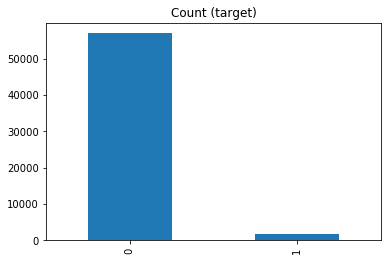

In [9]:
total_features_df.defect.value_counts().plot(kind='bar', title='Count (target)');
trans_features.shape

In [10]:
#Apply undersampling
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import CondensedNearestNeighbour
rus = RandomUnderSampler(random_state=10)
X_res, y_res = rus.fit_resample(trans_features,target)
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
print(X_res.shape)

Using TensorFlow backend.


(3266, 30)


In [88]:
from collections import Counter
Counter(y_res).keys() # equals to list(set(words))
#Counter(y_res).values() 

dict_keys([0, 1])

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.4, random_state=42)


(107569, 30)

In [26]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

In [28]:
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)
gpr.fit(X_train, y_train)


In [96]:
y_pred, sigma = gpr.predict(X_test, return_std=True)
y_pred_nr=(y_pred>0.5)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_nr)

array([[624, 441],
       [377, 642]], dtype=int64)

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)
#mean_squared_error(y_test,y_pred)

0.47233584051914346

In [120]:
X_test

array([[10.89158999,  4.96021269,  0.09595682, ...,  1.23244558,
        -1.05080013,  0.52421291],
       [-8.14314753, -4.56766992, -0.44973983, ..., -1.58641404,
         0.59987509,  1.18760284],
       [-4.35216745, -6.51219218, -4.13556461, ...,  0.22891584,
        -0.01950055,  0.24609676],
       ...,
       [-7.07946778, -5.74113798, -1.64497542, ...,  0.53834735,
         0.6878671 ,  0.07393744],
       [-3.44221472, -7.06377132, -4.99224983, ..., -1.32359889,
         0.50575432,  0.13776678],
       [13.44376427,  4.1593884 , -1.61449744, ...,  1.28358402,
        -0.64782856,  1.20415648]])

Text(0, 0.5, 'Predictions')

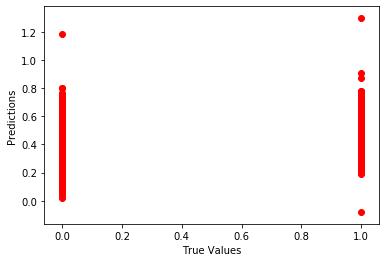

In [125]:
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)
#print(X_test.shape,y_test.shape,y_pred.shape)

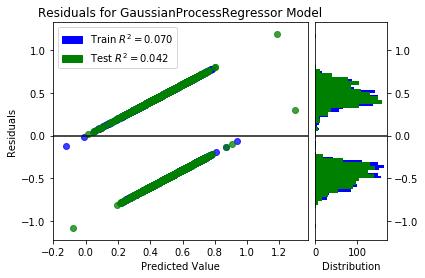

In [127]:
from yellowbrick.regressor import ResidualsPlot
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)
visualizer = ResidualsPlot(gpr)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()   

In [11]:
from imblearn.under_sampling import AllKNN 
allknn = AllKNN()
X_res, y_res = allknn.fit_resample(trans_features,target)
X_res.shape

(53402, 30)

In [12]:
X_res.shape

(53402, 30)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.4, random_state=42)
X_train.shape

(32041, 30)

In [24]:
type(X_train)

numpy.ndarray

In [18]:
y_train[:1000].shape

(1000,)

In [21]:
import george
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gp = george.GP(kernel, solver=george.HODLRSolver)

In [26]:
gp.compute(X_train)

AttributeError: 'Product' object has no attribute 'ndim'

In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0, copy_X_train=False).fit(X_train,y_train)
gpc.score(X_train,y_train) 


MemoryError: 

In [50]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [51]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [53]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(trans_features, target)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
n_restarts_optimizer=0, normalize_y=False,
optimizer='fmin_l_bfgs_b', random_state=None)

KeyboardInterrupt: 

In [7]:
def roll(x):

    #return x.rolling(10,win_type=type).mean().shift(-9)
    return x.rolling(10).mean().shift(-9)

In [8]:
diff = total_data_df['shotNum'].diff().ne(1).cumsum()
total_data_df[['cav1_defect','cav2_defect','defect']]=total_data_df.groupby(['Cast_date','shift',diff])['cav1_defect','cav2_defect','defect'].shift()#.apply(lambda x: roll(x))
#total_data_df['regressed'].fillna(total_data_df['target'],inplace=True)

In [9]:
total_data_df[['cav1_defect','cav2_defect','defect']]=total_data_df[['cav1_defect','cav2_defect','defect']].fillna(value=0)

In [10]:
#total_data_df.regressed.value_counts()
total_data_df.drop(['Cast_date','Week','dayOfWeek','shotNum','shift','difference_file'],inplace=True,axis=1)

In [11]:
total_data_df.drop(['Part'],inplace=True,axis=1)

In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import VarianceThreshold
 

train_features, test_features, train_labels, test_labels = train_test_split(  
    total_data_df.drop(labels=['File_No', 'Part','Die','Shift','Shot_no'], axis=1),
    total_data_df['cav1_defect'],
    test_size=0.2,
    random_state=41)

correlated_features = set()  
correlation_matrix = total_data_df.corr()  
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
total_data_df

In [ ]:
train_features.drop(labels=correlated_features, axis=1, inplace=True)  
test_features.drop(labels=correlated_features, axis=1, inplace=True)


In [13]:
features_df = total_data_df.iloc[:,1:-1]
label_df = total_data_df.iloc[:, -3:-2]
print(features_df.shape)
print(label_df.shape)

(108765, 281)
(108765, 1)


In [34]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)
print(scaled_features)
target = label_df.values.squeeze()
target

(108765, 281)
[[ 0.28502309 -1.99599787 -0.19374364 ... -1.6029389  -0.1102855
  -0.10925604]
 [ 0.46312499 -1.90245949 -0.19436477 ... -1.59768671 -0.1102855
  -0.10925604]
 [ 0.60249447 -1.82751518 -0.19436177 ... -1.59243453 -0.1102855
  -0.10925604]
 ...
 [ 0.08556653  0.52904782 -0.02801935 ... -0.13232763 -0.1102855
  -0.10925604]
 [ 0.0974837   0.51034153 -0.05120328 ... -0.12707545 -0.1102855
  -0.10925604]
 [-3.34233131  0.15242611  6.57009902 ... -0.12182327 -0.1102855
  -0.10925604]]


array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_compon

(108765, 154)

In [35]:
from sklearn import linear_model

ransac = linear_model.RANSACRegressor()
ransac.fit(X_grd, target)

print(ransac.score(X_grd, target))

ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).

In [31]:
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X_grd, label_df)
#gp.fit(train_features, train_labels)

MemoryError: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=15,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [ ]:
features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)  

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(label_df)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(label_df))
print(utils.multiclass.type_of_target(label_df.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    scaled_features, label_df, test_size=0.4, random_state=42)
 


In [ ]:
features = feature_selector.fit(np.array(train_features), train_labels)

In [ ]:
filtered_features= train_features.columns[list(features.k_feature_idx_)]  
filtered_features

In [ ]:
cor_target = abs(corr["regressed"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [ ]:
leakage_cav1_file = os.path.join(data_folder, 'leakage_data_cav1.csv')
leakage_cav2_file = os.path.join(data_folder, 'leakage_data_cav2.csv')

leakage_cav1_df = pd.read_csv(leakage_cav1_file, index_col=0)
leakage_cav2_df = pd.read_csv(leakage_cav2_file, index_col=0)

In [ ]:
 leakage_df = pd.merge(left=leakage_cav1_df, right=leakage_cav2_df, on='File_No')
print(leakage_df.shape)
leakage_df.head()
from scipy.stats import ks_2samp

cav1_result = leakage_df['ratio_value_x'].values
cav2_result = leakage_df['ratio_value_y'].values

#ks_2samp(cav1_result, cav2_result) 
#Ks_2sampResult(statistic=0.01791426743442104, pvalue=0.265966382307893)
leakage_df['target_val'] = (leakage_df['ratio_value_x'] + leakage_df['ratio_value_y'])/2
leakage_data_df = pd.merge(left=data_df, right=leakage_df.loc[:,['File_No', 'target_val']], on='File_No')
leakage_data_df = pd.merge(left=leakage_data_df, right=total_data_df.loc[:, ['File_No', 'target']], on='File_No')
print(leakage_data_df.shape)
leakage_data_df.head()

In [ ]:
reg_features_df = leakage_data_df.iloc[:,1:-2]
reg_label_df = leakage_data_df.iloc[:,-2:-1]

In [ ]:
scaler_reg = StandardScaler()
features_reg_scaled = scaler_reg.fit_transform(reg_features_df)
target_reg = reg_label_df.values.squeeze()

In [ ]:
from sklearn import linear_model

ransac = linear_model.RANSACRegressor()
ransac.fit(train_features, train_labels)

print(ransac.score(train_features, train_labels))

In [ ]:
predictions = ransac.predict(features_reg_scaled)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(inlier_mask.sum())
print(outlier_mask.sum())
print(predictions.shape)
print(target_reg.shape)
plt.scatter(target_reg[inlier_mask], predictions[inlier_mask], c='b')
plt.scatter(target_reg[outlier_mask], predictions[outlier_mask], c='r')
plt.ylim([-0.5,10])

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(label_df)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(label_df))
print(utils.multiclass.type_of_target(label_df.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(features_df, training_scores_encoded)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
X_RFE = features_df[features_df.columns[rfe.support_]]

In [ ]:
from sklearn import linear_model

ransac = linear_model.RANSACRegressor()
ransac.fit(X_RFE, training_scores_encoded)

print(ransac.score(X_RFE, training_scores_encoded))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    linreg=LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat = linreg.predict(X_test)
    y_hat_train = linreg.predict(X_train)
    print('R_squared Score:', linreg.score(X, y))
    #Display errors
    #print('Mean Absolute Error:', mas(y_test, y_hat))
    print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hat)))
    print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))
    #Compare predicted and actual values
    print('Mean Predicted:', y_hat.mean())
    print('Mean actual:', y_test.mean())
    return linreg
#lin_reg(X_RFE, training_scores_encoded)

In [ ]:
lin_reg(X_RFE, training_scores_encoded)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)
print(scaled_features)


In [ ]:
 reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_features)
print(embedding.shape)

In [ ]:
classes = ['No Defect', 'Cav1 defect', 'Cav2 defect', 'C1 & C2 defect']
target = label_df.values.squeeze()

embedding_df = pd.DataFrame(data=embedding, columns=['embedding1', 'embedding2'], index=features_df.index)
embedding_df['label'] = label_df['regressed'].map(dict(zip(range(4), classes)))
embedding_df.sort_values(by='label', inplace=True, ascending=False)
embedding_df.head()

In [ ]:
fig, ax = plt.subplots(1, figsize=(25, 10))
sns.scatterplot(data=embedding_df, x='embedding1', y='embedding2', hue='label', ax=ax)

In [ ]:
total_data_df

In [ ]:
reg_features_df = total_data_df.iloc[:,1:-1]
reg_label_df = total_data_df.iloc[:,-1:]
reg_features_df.head()

In [ ]:
reg_label_df.head()

In [ ]:
scaler_reg = StandardScaler()
features_reg_scaled = scaler_reg.fit_transform(reg_features_df)
target_reg = reg_label_df.values.squeeze()
print(target_reg)
features_reg_scaled.shape


In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features_reg_scaled, target_reg, test_size=0.4, random_state=42)
 


In [ ]:
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.03, 'loss': 'huber'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(train_features, train_labels)
mse = mean_squared_error(test_labels, clf.predict(test_features))
print("MSE: %.4f" % mse)

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


NameError: name 'scaled_features' is not defined